# PROJECT - 4 (STOCK DATA ANALYSIS)

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline

In [63]:
#Read Data into Dataframe
data = pd.read_csv(r'data\data_stocks.csv')

In [64]:
#Have a look at the Data
data.head()  

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [4]:
data.shape # Total Dimension of the Data

(41266, 502)

In [5]:
#Keep Original Dataframe and take a copy
dataset = data.copy(deep = True)

## Problem 1:
## There are various stocks for which we have collected a data set, which all stocks are
## apparently similar in performance

In [6]:
#Drop SP500 column as the Stocks are need to be compared
dataset.drop('SP500', axis=1,inplace=True)

In [8]:
#Convert the DATE column into Index
dataset.set_index('DATE', inplace=True)

In [9]:
#For Analyzing the Stocks we need them in rows rather than in column, So transpose them
dataTransposed = dataset.transpose()
dataTransposed.head()

DATE,1491226200,1491226260,1491226320,1491226380,1491226440,1491226500,1491226560,1491226620,1491226680,1491226740,...,1504209060,1504209120,1504209180,1504209240,1504209300,1504209360,1504209420,1504209480,1504209540,1504209600
NASDAQ.AAL,42.33,42.36,42.3100,42.3700,42.5378,42.5399,42.470,42.47,42.390,42.330,...,44.72,44.73,44.76,44.75,44.71,44.720,44.73,44.740,44.71,44.74
NASDAQ.AAPL,143.68,143.70,143.6901,143.6400,143.6600,143.7800,143.864,143.81,143.815,143.800,...,164.16,164.06,164.19,164.20,164.14,164.110,164.12,164.010,163.88,163.98
NASDAQ.ADBE,129.63,130.32,130.2250,130.0729,129.8800,130.0700,130.180,130.14,130.100,130.210,...,155.06,155.01,155.12,155.09,155.04,155.090,155.16,155.065,154.96,155.16
NASDAQ.ADI,82.04,82.08,82.0300,82.0000,82.0350,82.0400,82.120,82.19,82.230,82.165,...,83.71,83.70,83.63,83.69,83.66,83.670,83.65,83.620,83.58,83.69
NASDAQ.ADP,102.23,102.14,102.2125,102.1400,102.0600,102.0400,102.330,102.37,102.380,102.330,...,106.62,106.56,106.62,106.60,106.63,106.565,106.59,106.520,106.40,106.47


In [13]:
PCADR = PCA(n_components=3) # Principle Component Analysis - Dimensionality Reduction 
datasetReduced = PCADR.fit_transform(dataTransposed)
datasetReduced.shape

(500, 3)

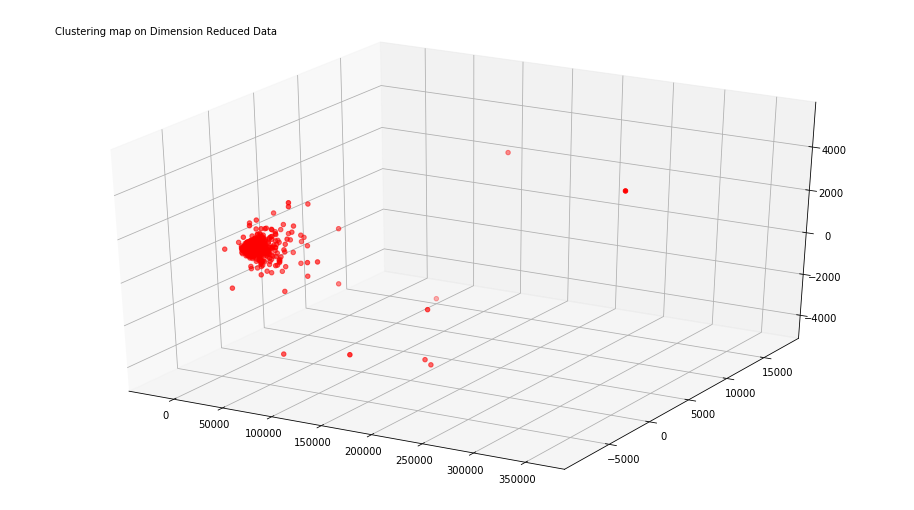

In [26]:
#Visulaize the Data where the Dimension is Reduced
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')
ax.text2D(0.05, 0.95, "Clustering map on Dimension Reduced Data", transform=ax.transAxes)
ax.scatter(datasetReduced[:,0], datasetReduced[:,1], datasetReduced[:,2], c= 'r')

In [27]:
#Check the Ideal number of Cluster (K) available in the Dataset using Elbow Methods
distortions = []
rng = range(2,20)
for k in rng:
    kmeanModel = KMeans(n_clusters=k).fit(dataTransposed)
    distortions.append(sum(np.min(cdist(dataTransposed, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / dataTransposed.shape[0])


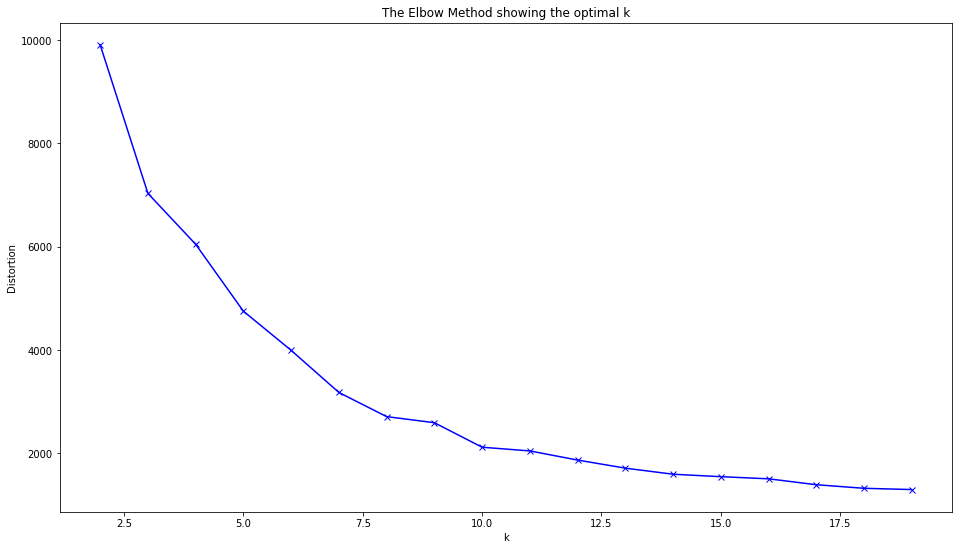

In [28]:
# Plot the elbow
plt.figure(figsize=(16,9))
plt.plot(rng, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [30]:
#Check the Ideal number of Cluster (K) available in the Dataset using Average silhouette method
for n_clusters in range(2,20):
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(dataTransposed)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dataTransposed, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.924016275071
For n_clusters = 3 The average silhouette_score is : 0.661252996473
For n_clusters = 4 The average silhouette_score is : 0.636913932006
For n_clusters = 5 The average silhouette_score is : 0.608707939015
For n_clusters = 6 The average silhouette_score is : 0.547460875328
For n_clusters = 7 The average silhouette_score is : 0.527022562386
For n_clusters = 8 The average silhouette_score is : 0.523188634154
For n_clusters = 9 The average silhouette_score is : 0.524218879618
For n_clusters = 10 The average silhouette_score is : 0.513192079254
For n_clusters = 11 The average silhouette_score is : 0.511181043514
For n_clusters = 12 The average silhouette_score is : 0.494087508663
For n_clusters = 13 The average silhouette_score is : 0.470650920685
For n_clusters = 14 The average silhouette_score is : 0.464734770342
For n_clusters = 15 The average silhouette_score is : 0.466103201606
For n_clusters = 16 The average silhouette

In [31]:
#From above tests the Elbow test looks more Reliant and no of clusters for this Dataset is 6
KmCluster = KMeans(n_clusters=6) #Create a K Means with 6 Clusters
KmCluster.fit(dataTransposed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [32]:
y_pred = KmCluster.predict(dataTransposed) #Predict to identify to get the Clustering of the Dataset

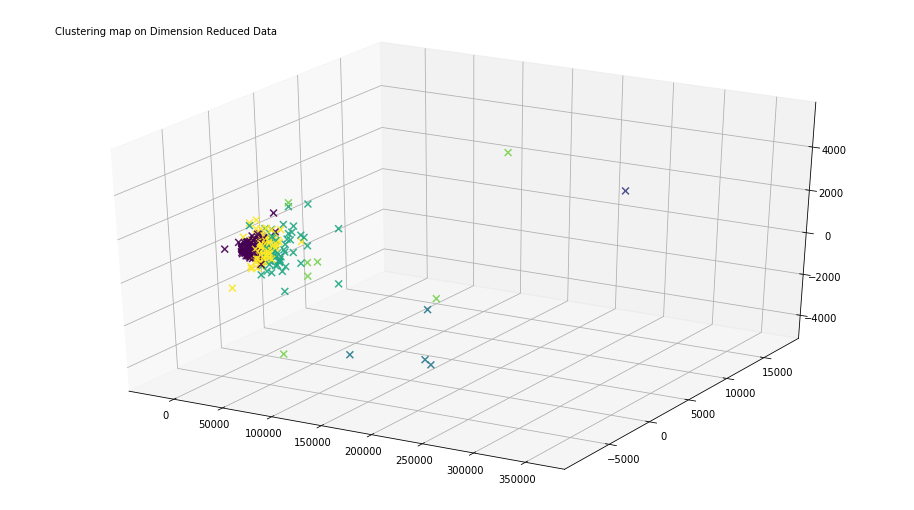

In [62]:
#Visualize the Data to see the clustering with Predicted value on the Dimension reduced data
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')
ax.text2D(0.05, 0.95, "Clustering map on Dimension Reduced Data", transform=ax.transAxes)
ax.scatter(datasetReduced[:,0], datasetReduced[:,1], datasetReduced[:,2],c=y_pred,marker='x', s=50^2,alpha=0.9 )

In [53]:
dataTransposed['Clustering'] = y_pred

In [54]:
#Below number of Clusters available which describes that are performing Similarly
dataTransposed.Clustering.value_counts()

0    263
5    169
3     56
4      7
2      4
1      1
Name: Clustering, dtype: int64

## Problem 2:
## How many Unique patterns that exist in the historical stock data set, based on
## fluctuations in price.

In [ ]:
#From of Number of Clustering Available There are 6 Patterns which are available in the DataSet, below are the set of Data from
# the 6 patterns

In [55]:
dataTransposed.loc[dataTransposed['Clustering']==1]

DATE,1491226200,1491226260,1491226320,1491226380,1491226440,1491226500,1491226560,1491226620,1491226680,1491226740,...,1504209120,1504209180,1504209240,1504209300,1504209360,1504209420,1504209480,1504209540,1504209600,Clustering
NASDAQ.PCLN,1776.26,1779.4606,1777.55,1776.4301,1774.08,1775.0,1776.585,1777.01,1776.03,1775.5736,...,1850.46,1850.8,1851.52,1851.85,1851.015,1852.1401,1852.29,1852.2499,1852.08,1


In [56]:
dataTransposed.loc[dataTransposed['Clustering']==2]

DATE,1491226200,1491226260,1491226320,1491226380,1491226440,1491226500,1491226560,1491226620,1491226680,1491226740,...,1504209120,1504209180,1504209240,1504209300,1504209360,1504209420,1504209480,1504209540,1504209600,Clustering
NASDAQ.AMZN,888.55,887.1173,887.5110,886.2700,886.5800,886.8000,887.31,888.5997,889.80,888.8450,...,980.03,980.540,980.540,980.02,979.840,980.01,979.81,979.445,980.60,2
NASDAQ.GOOG,829.41,833.1000,835.9184,833.6200,835.3200,835.1400,835.30,835.8000,836.32,836.7050,...,938.70,938.800,938.960,938.75,938.800,938.67,938.13,937.680,939.33,2
NASDAQ.GOOGL,847.83,852.1700,854.2800,852.7800,854.7500,853.9700,854.25,854.8250,855.28,855.5775,...,954.17,954.540,954.660,954.54,954.505,954.47,953.88,953.465,955.24,2
NASDAQ.ISRG,766.47,766.5400,767.0300,766.5853,766.5853,766.5853,766.61,767.2650,767.98,766.7800,...,1004.43,1004.705,1004.875,1004.24,1004.400,1004.67,1004.04,1003.310,1004.67,2


In [58]:
dataTransposed.loc[dataTransposed['Clustering']==4]

DATE,1491226200,1491226260,1491226320,1491226380,1491226440,1491226500,1491226560,1491226620,1491226680,1491226740,...,1504209120,1504209180,1504209240,1504209300,1504209360,1504209420,1504209480,1504209540,1504209600,Clustering
NASDAQ.CHTR,330.73,330.73,330.730,330.730,330.7300,330.7300,330.730,330.7300,330.73,330.730,...,398.25,397.970,397.9100,398.14,398.230,398.24,398.330,397.98,398.54,4
NASDAQ.EQIX,400.94,400.40,401.985,401.500,399.7704,399.7704,401.015,400.7900,400.15,399.795,...,468.61,468.575,468.1700,468.27,468.240,468.19,468.120,467.93,468.41,4
NASDAQ.REGN,388.00,390.16,389.890,390.375,390.5144,390.7350,390.105,390.1239,390.74,391.080,...,496.09,496.615,496.6100,496.56,496.600,496.63,496.770,496.59,496.90,4
NYSE.AZO,720.50,719.46,715.010,712.270,708.0000,704.3200,703.500,704.1500,704.15,706.110,...,528.55,528.410,528.5300,528.05,528.135,528.21,528.355,528.14,528.46,4
NYSE.BLK,385.20,385.20,385.200,383.330,384.1050,383.9800,384.041,384.0200,384.05,383.445,...,419.57,419.610,419.6900,419.55,419.290,419.28,419.270,418.94,418.96,4
NYSE.CMG,449.35,449.93,451.680,450.390,450.1000,449.9025,450.810,451.4662,451.27,451.861,...,316.55,316.600,316.4850,316.55,316.490,316.57,316.550,316.32,316.70,4
NYSE.SHW,309.90,311.50,311.500,311.500,311.5000,311.5000,311.500,311.5000,311.50,311.090,...,338.84,338.930,338.9238,338.88,338.680,338.82,338.790,338.54,339.20,4


In [59]:
dataTransposed.loc[dataTransposed['Clustering']==3]

DATE,1491226200,1491226260,1491226320,1491226380,1491226440,1491226500,1491226560,1491226620,1491226680,1491226740,...,1504209120,1504209180,1504209240,1504209300,1504209360,1504209420,1504209480,1504209540,1504209600,Clustering
NASDAQ.AAPL,143.680,143.7000,143.6901,143.6400,143.6600,143.7800,143.8640,143.8100,143.8150,143.8000,...,164.0600,164.1900,164.2000,164.1400,164.1100,164.1200,164.0100,163.8800,163.980,3
NASDAQ.AMGN,164.630,164.6800,164.9050,164.7600,164.8500,164.9225,164.8200,164.7269,164.7050,164.7900,...,177.7400,177.8600,177.8600,177.8650,177.8512,177.7800,177.7600,177.6300,177.820,3
NASDAQ.AVGO,219.110,219.9800,219.3900,219.3000,219.1800,219.4900,219.7200,219.8700,219.8200,219.2701,...,252.0500,252.0700,252.0950,251.7900,251.9150,252.1200,252.0100,251.7600,252.070,3
NASDAQ.BIIB,274.080,273.9900,274.2750,273.5900,273.5400,274.1300,273.8700,274.0500,273.8700,274.3800,...,315.9700,316.0500,316.0200,316.0000,316.2000,316.5800,316.3200,316.3700,316.580,3
NASDAQ.COST,167.740,167.7760,168.0000,168.2000,168.0400,168.0950,168.0825,168.0100,167.9000,168.0440,...,156.7800,156.8800,156.8100,156.8000,156.8000,156.8200,156.8000,156.7300,156.740,3
NASDAQ.FB,141.940,141.8625,141.9100,141.8700,141.7800,141.9286,142.1500,142.0600,142.1500,142.0700,...,171.7550,171.8200,171.7900,171.7700,171.8200,171.8250,171.7500,171.6600,172.000,3
NASDAQ.HSIC,170.220,170.8150,170.8150,170.8150,170.8150,169.9750,169.9700,169.9700,169.9200,169.9200,...,173.7299,173.8300,173.8000,173.8400,173.8800,173.8900,173.8900,173.7100,173.680,3
NASDAQ.IDXX,155.070,155.4837,155.7100,155.5000,155.3500,155.3800,155.3411,155.4265,155.2950,155.4900,...,155.7800,155.7600,155.7800,155.6600,155.5800,155.6300,155.6200,155.3700,155.430,3
NASDAQ.ILMN,171.000,171.2950,171.0540,170.8200,170.8384,170.7150,171.3700,171.2700,170.9300,170.7700,...,204.0200,204.1400,204.1150,204.1000,204.1600,204.1900,204.2300,204.0700,204.460,3
NASDAQ.LRCX,128.530,128.6500,128.3100,128.2101,128.2200,128.5102,128.4301,128.4300,128.3050,128.2500,...,165.8200,165.8900,165.8800,165.7200,165.7800,165.9200,165.9100,165.7700,165.980,3


In [60]:
dataTransposed.loc[dataTransposed['Clustering']==5]

DATE,1491226200,1491226260,1491226320,1491226380,1491226440,1491226500,1491226560,1491226620,1491226680,1491226740,...,1504209120,1504209180,1504209240,1504209300,1504209360,1504209420,1504209480,1504209540,1504209600,Clustering
NASDAQ.ADBE,129.6300,130.3200,130.2250,130.0729,129.8800,130.0700,130.1800,130.140,130.1000,130.2100,...,155.0100,155.1200,155.0900,155.0400,155.0900,155.1600,155.0650,154.9600,155.160,5
NASDAQ.ADI,82.0400,82.0800,82.0300,82.0000,82.0350,82.0400,82.1200,82.190,82.2300,82.1650,...,83.7000,83.6300,83.6900,83.6600,83.6700,83.6500,83.6200,83.5800,83.690,5
NASDAQ.ADP,102.2300,102.1400,102.2125,102.1400,102.0600,102.0400,102.3300,102.370,102.3800,102.3300,...,106.5600,106.6200,106.6000,106.6300,106.5650,106.5900,106.5200,106.4000,106.470,5
NASDAQ.ADSK,85.2200,85.6500,85.5100,85.4872,85.7001,85.9200,85.9120,85.820,85.8800,85.8600,...,114.5100,114.5600,114.5150,114.4500,114.4900,114.5200,114.4700,114.3300,114.460,5
NASDAQ.ALXN,121.5200,121.4800,121.9300,121.4400,121.6000,121.7000,121.6300,121.610,121.7150,121.8500,...,142.4600,142.8750,142.8300,142.6300,142.4250,142.4500,142.3300,142.1700,142.410,5
NASDAQ.CBOE,81.0300,81.2100,81.2100,81.1300,81.1200,81.2200,81.1600,81.160,81.1600,81.1300,...,100.8800,100.8900,100.8800,100.8899,100.8900,100.8800,100.8600,100.8300,100.890,5
NASDAQ.CELG,124.8900,124.9900,125.0000,124.7300,124.8300,125.0800,125.1300,125.170,125.1100,125.1000,...,138.6000,138.6800,138.7190,138.7500,138.7353,138.7799,138.8600,138.7350,138.985,5
NASDAQ.CME,119.3850,118.8100,118.8300,118.6800,118.9350,118.7800,118.9800,118.960,119.0000,118.8100,...,125.9300,125.9900,126.0000,125.9600,125.9100,125.8900,125.8500,125.7800,125.800,5
NASDAQ.CTAS,126.8600,126.8600,126.9576,126.7000,126.8900,126.9500,126.8400,126.720,126.8700,126.8800,...,135.1100,135.0700,135.0800,135.0700,134.9800,135.0800,134.9800,134.9000,135.010,5
NASDAQ.CTXS,83.5400,83.9400,83.9400,83.7064,84.0000,83.8743,83.9100,83.810,83.8967,83.8967,...,78.1750,78.2400,78.2550,78.2400,78.2100,78.2100,78.2200,78.2000,78.210,5


In [61]:
dataTransposed.loc[dataTransposed['Clustering']==0]

DATE,1491226200,1491226260,1491226320,1491226380,1491226440,1491226500,1491226560,1491226620,1491226680,1491226740,...,1504209120,1504209180,1504209240,1504209300,1504209360,1504209420,1504209480,1504209540,1504209600,Clustering
NASDAQ.AAL,42.3300,42.3600,42.3100,42.3700,42.5378,42.5399,42.4700,42.4700,42.3900,42.3300,...,44.7300,44.7600,44.7500,44.7100,44.7200,44.7300,44.7400,44.7100,44.740,0
NASDAQ.AKAM,59.7600,59.8400,59.7950,59.6200,59.6200,59.6100,59.5400,59.4100,59.4300,59.2600,...,47.1150,47.1250,47.1300,47.1450,47.1500,47.1500,47.1500,47.1350,47.150,0
NASDAQ.AMAT,38.9900,39.0100,38.9100,38.8400,38.9300,38.9500,38.9600,38.9600,38.9125,38.8900,...,45.1650,45.1650,45.1800,45.1300,45.1300,45.1300,45.1350,45.0650,45.120,0
NASDAQ.AMD,14.6100,14.7100,14.6400,14.6300,14.6700,14.6800,14.6563,14.6840,14.6942,14.6300,...,12.9900,12.9900,12.9950,12.9850,12.9850,12.9850,12.9700,12.9650,13.000,0
NASDAQ.ATVI,49.8500,49.9400,49.8600,49.9150,49.9150,49.9700,50.0000,50.0200,50.0100,50.0100,...,65.5700,65.5300,65.5600,65.5550,65.5800,65.5900,65.5400,65.4450,65.560,0
NASDAQ.BBBY,39.4300,39.6800,39.6000,39.5700,39.5500,39.5800,39.4900,39.5100,39.4950,39.4433,...,29.3000,29.3000,29.3000,29.3000,29.3000,29.3000,29.3000,29.3000,29.300,0
NASDAQ.CA,31.7800,31.7800,31.7650,31.8300,31.8300,31.8300,31.7900,31.8100,31.8100,31.8000,...,33.2100,33.2150,33.2200,33.2200,33.2000,33.2100,33.1900,33.1600,33.180,0
NASDAQ.CERN,58.8200,58.4950,58.4700,58.4200,58.6000,58.5200,58.5900,58.6100,58.5500,58.5300,...,67.7200,67.7300,67.6900,67.6700,67.7200,67.7300,67.7200,67.7100,67.780,0
NASDAQ.CHRW,77.7250,77.9400,77.8150,77.9500,78.0500,78.0700,77.9700,78.0700,77.9950,77.9700,...,70.7950,70.7600,70.7200,70.7000,70.6800,70.6400,70.6400,70.5850,70.635,0
NASDAQ.CINF,72.4300,72.0400,72.0550,72.1400,72.2150,72.3000,72.4600,72.5300,72.4800,72.2300,...,76.9400,76.9600,76.9800,76.9518,76.9250,76.9400,76.9100,76.8200,76.840,0


## Problem 3:
## Identify which all stocks are moving together and which all stocks are different from
## each other.

In [ ]:
#To find the correlation lets use the corr function available in pandas dataframe
#Correlation has to be done for the  stock returns so use pct_change of pandas

In [34]:
dataset.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
1491226200,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1491226260,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
1491226320,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
1491226380,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
1491226440,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [35]:
#In finance we calculate correlations between stock returns and not stock prices,as returns tend 
#to follow normal distribution and prices don't
dataCorr = dataset.pct_change().corr()  #Percent Change and the Correlation function
dataCorr.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
NASDAQ.AAL,1.000000,0.174922,0.215011,0.179858,0.127640,0.174808,0.165374,0.004682,0.202740,0.169198,...,0.173904,0.039647,-0.025876,0.044681,0.080293,0.027820,0.148583,0.139620,0.258290,0.092091
NASDAQ.AAPL,0.174922,1.000000,0.420229,0.346401,0.140774,0.305459,0.231206,0.100014,0.428368,0.317548,...,0.162557,0.026764,-0.042151,0.073764,0.030344,0.058268,0.168753,0.140041,0.119013,0.118419
NASDAQ.ADBE,0.215011,0.420229,1.000000,0.344602,0.142926,0.399755,0.181671,0.125482,0.437029,0.372503,...,0.167822,-0.029397,-0.015214,0.058737,-0.035857,0.019401,0.165082,0.175995,0.121715,0.147283
NASDAQ.ADI,0.179858,0.346401,0.344602,1.000000,0.150950,0.256884,0.145596,0.120534,0.459596,0.376768,...,0.190093,0.030021,-0.012370,0.068384,0.022777,0.044319,0.171289,0.159824,0.072878,0.095151
NASDAQ.ADP,0.127640,0.140774,0.142926,0.150950,1.000000,0.109130,0.294058,0.039224,0.122217,0.115391,...,0.069521,0.005739,0.033053,0.050635,0.064287,0.025244,0.128070,0.098258,0.063862,0.073475


In [42]:
dataCorr.head(50) # Sample Output of the First 50 Records
#Records Which are close to +1 and -1 are closely Related

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
NASDAQ.AAL,1.000000,0.174922,0.215011,0.179858,0.127640,0.174808,0.165374,0.004682,0.202740,0.169198,...,0.173904,0.039647,-0.025876,0.044681,0.080293,0.027820,0.148583,0.139620,0.258290,0.092091
NASDAQ.AAPL,0.174922,1.000000,0.420229,0.346401,0.140774,0.305459,0.231206,0.100014,0.428368,0.317548,...,0.162557,0.026764,-0.042151,0.073764,0.030344,0.058268,0.168753,0.140041,0.119013,0.118419
NASDAQ.ADBE,0.215011,0.420229,1.000000,0.344602,0.142926,0.399755,0.181671,0.125482,0.437029,0.372503,...,0.167822,-0.029397,-0.015214,0.058737,-0.035857,0.019401,0.165082,0.175995,0.121715,0.147283
NASDAQ.ADI,0.179858,0.346401,0.344602,1.000000,0.150950,0.256884,0.145596,0.120534,0.459596,0.376768,...,0.190093,0.030021,-0.012370,0.068384,0.022777,0.044319,0.171289,0.159824,0.072878,0.095151
NASDAQ.ADP,0.127640,0.140774,0.142926,0.150950,1.000000,0.109130,0.294058,0.039224,0.122217,0.115391,...,0.069521,0.005739,0.033053,0.050635,0.064287,0.025244,0.128070,0.098258,0.063862,0.073475
NASDAQ.ADSK,0.174808,0.305459,0.399755,0.256884,0.109130,1.000000,0.154755,0.110725,0.409276,0.275399,...,0.176135,0.021824,-0.008765,0.066842,0.047293,0.038301,0.179759,0.189110,0.095386,0.109328
NASDAQ.AKAM,0.165374,0.231206,0.181671,0.145596,0.294058,0.154755,1.000000,0.066173,0.193266,0.084169,...,0.110795,0.040789,0.004360,0.026931,0.040709,0.026499,0.112970,-0.020938,0.152620,0.117320
NASDAQ.ALXN,0.004682,0.100014,0.125482,0.120534,0.039224,0.110725,0.066173,1.000000,0.112479,0.100671,...,0.089658,0.026969,0.015356,0.064752,0.024784,0.267341,0.088815,0.084019,-0.007161,0.106986
NASDAQ.AMAT,0.202740,0.428368,0.437029,0.459596,0.122217,0.409276,0.193266,0.112479,1.000000,0.459298,...,0.189070,0.006372,-0.058169,0.085927,0.006280,0.038196,0.183855,0.174638,0.096705,0.112435
NASDAQ.AMD,0.169198,0.317548,0.372503,0.376768,0.115391,0.275399,0.084169,0.100671,0.459298,1.000000,...,0.152556,0.018520,-0.057865,0.058788,0.001148,0.014960,0.108005,0.143507,0.094794,0.074770


In [41]:

#Function to Create the Heat Map Function
def VisualizeWithHeadMap(dataCorrSubset):
    '''
    Function which creates an HeatMap Graph for a datafram
    Parm : Dataframe
    '''
    fig = plt.figure(figsize=(16,9))
    ax = fig.add_subplot(111)
    heatmap = ax.pcolor(dataCorrSubset, cmap=plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    ax.set_xticks(np.arange(dataCorrSubset.shape[0] + 0.5))
    ax.set_yticks(np.arange(dataCorrSubset.shape[0] + 0.5))
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    columns = dataCorrSubset.columns
    rows = dataCorrSubset.index

    ax.set_xticklabels(columns)
    ax.set_yticklabels(rows)

    plt.xticks(rotation=90)
    heatmap.set_clim(-1,1)
    plt.tight_layout()
    plt.show()

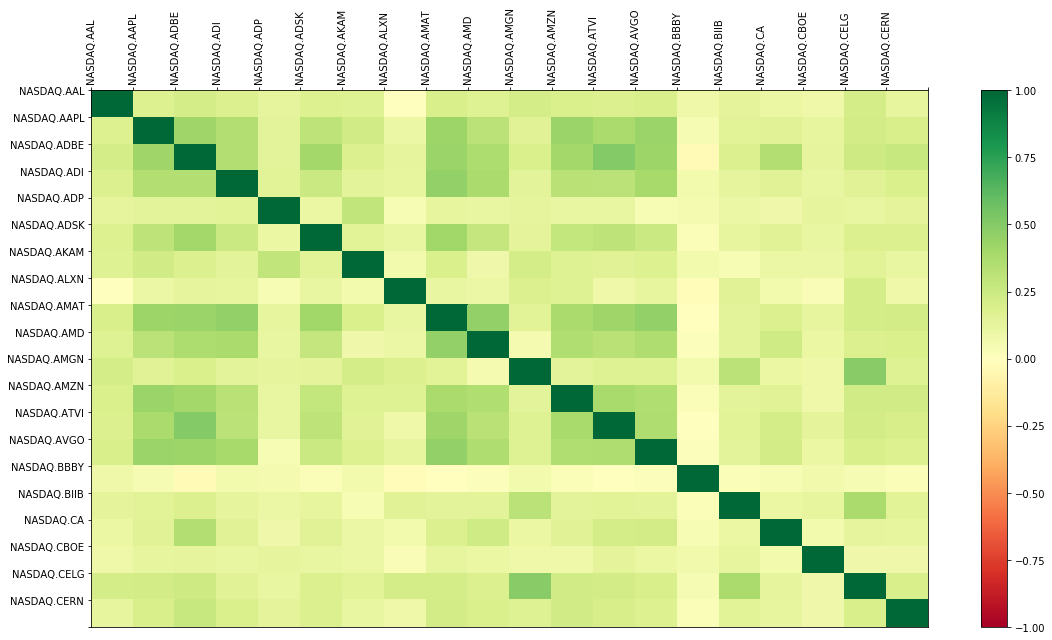

In [44]:
#Heat Map of First 20 Records
VisualizeWithHeadMap(dataCorr.iloc[:20,:20])



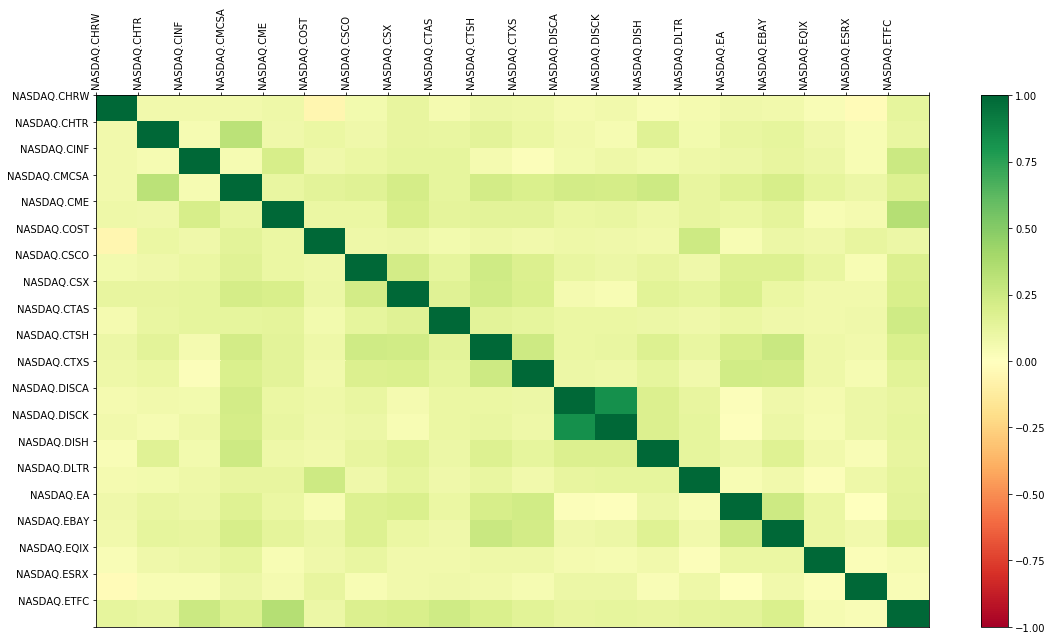

In [45]:
#Heat Map of  20  to 40 Records
VisualizeWithHeadMap(dataCorr.iloc[20:40,20:40])


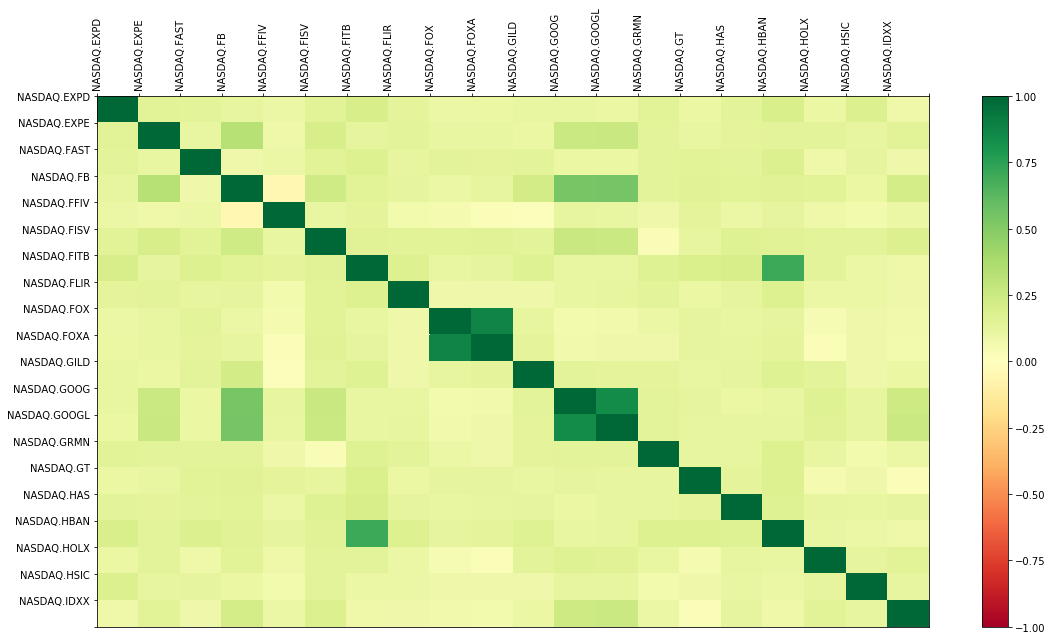

In [46]:
#Heat Map of  40  to 60 Records
VisualizeWithHeadMap(dataCorr.iloc[40:60,40:60])


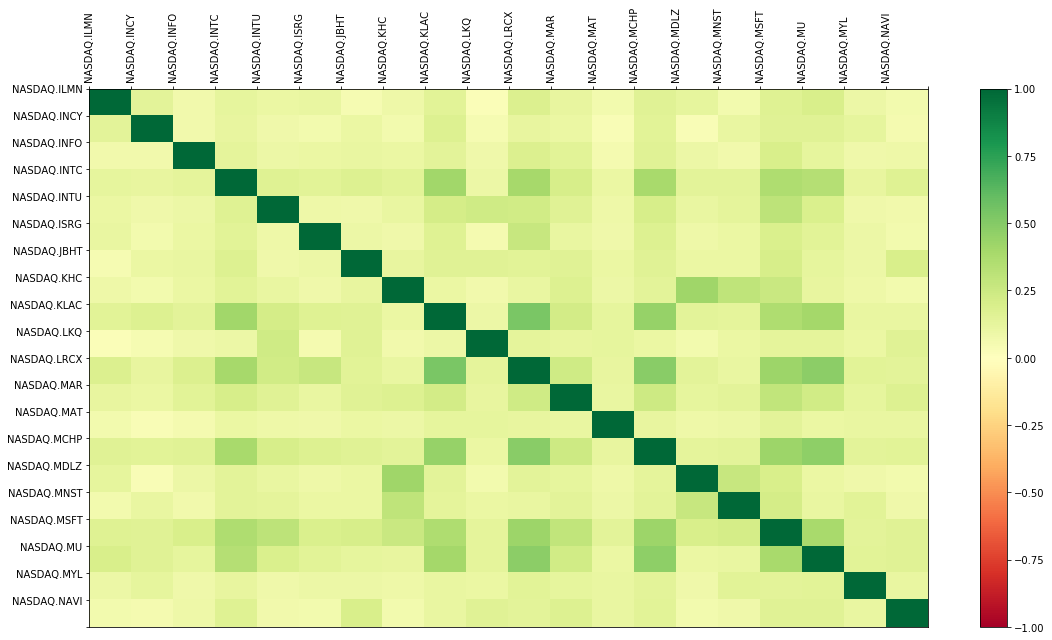

In [47]:
#Heat Map of  60  to 80 Records
VisualizeWithHeadMap(dataCorr.iloc[60:80,60:80])


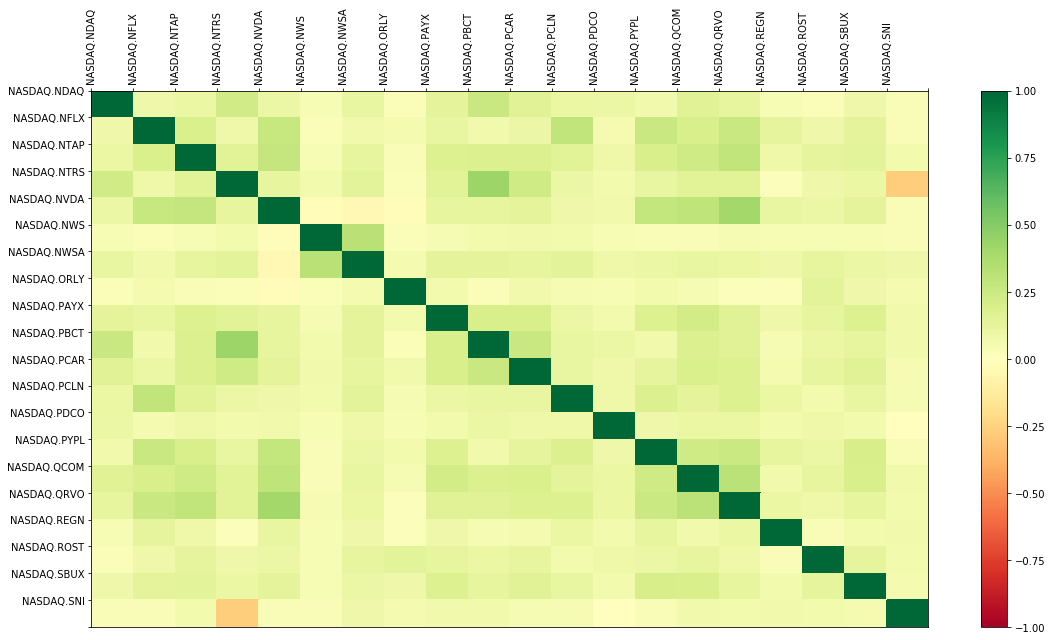

In [49]:
#Heat Map of  80  to 100 Records
VisualizeWithHeadMap(dataCorr.iloc[80:100,80:100])